In [16]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from collections import defaultdict

data_path = '/opt/ml/input/data/train/train_added_label.csv'
data_df = pd.read_csv(data_path)
label_list = data_df['label'].values.tolist()

In [17]:
labels_dict = defaultdict(int)

for label in label_list:
    labels_dict[label] += 1

keys = list(labels_dict.keys())
keys.sort()

label_list = [labels_dict[key] for key in keys]

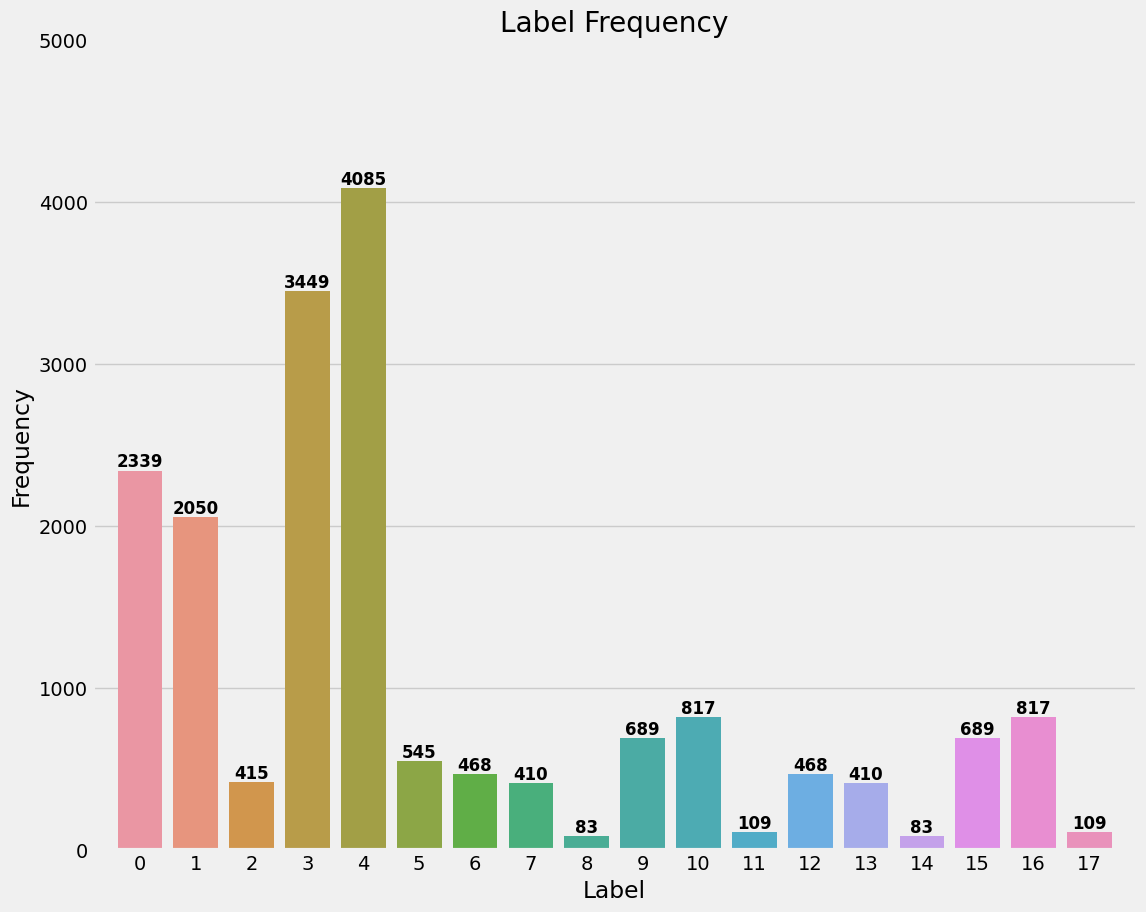

In [18]:
mpl.style.use('fivethirtyeight')

flg, ax = plt.subplots(1, 1, figsize=(12, 10))

ax = sns.barplot(x=keys, y=label_list)

ax.margins(0.025)
ax.set_title('Label Frequency')
ax.set_ylim(0, 5000)
ax.set_xlabel('Label')
ax.set_ylabel('Frequency')

for label, label_count in zip(keys, label_list):
    ax.text(x=label, y=label_count, s=label_count,
        va='bottom', ha='center', fontsize=12, fontweight='semibold'
    )

plt.show()

In [19]:
file_paths = data_df['image_path'].values.tolist()

In [22]:
import cv2
from tqdm import tqdm

shapes_dict = defaultdict(int)

for file_path in tqdm(file_paths):
    image = cv2.imread(file_path)
    shapes_dict[image.shape] += 1

100%|██████████| 18035/18035 [00:41<00:00, 435.24it/s]


In [23]:
shapes_dict

defaultdict(int, {(512, 384, 3): 18035})

In [24]:
data_path = '/opt/ml/input/data/eval/info.csv'
data_df = pd.read_csv(data_path)
file_paths = data_df['ImageID'].values.tolist()

In [27]:
import cv2
from tqdm import tqdm

shapes_dict = defaultdict(int)

for file_path in tqdm(file_paths):
    image = cv2.imread(f"/opt/ml/input/data/eval/images/{file_path}")
    shapes_dict[image.shape] += 1

100%|██████████| 12600/12600 [00:29<00:00, 422.59it/s]


In [28]:
shapes_dict

defaultdict(int, {(512, 384, 3): 12600})